In [ ]:
%%writefile data/README_data.md
# Información del Dataset AI4I
Dataset utilizado para clustering.
Link oficial: https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

Overwriting data/README_data.md


In [ ]:
%%writefile requirements.txt
pandas
numpy
scikit-learn
matplotlib
seaborn

Overwriting requirements.txt


In [ ]:
%%writefile src/preprocessing.py
import pandas as pd
from sklearn.preprocessing import StandardScaler

def load_and_scale(df):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)
    return X_scaled

Overwriting src/preprocessing.py


In [ ]:
%%writefile src/kmeans_model.py
from sklearn.cluster import KMeans

def apply_kmeans(X, n_clusters=4):
    km = KMeans(n_clusters=n_clusters, random_state=42)
    labels = km.fit_predict(X)
    return labels, km


Overwriting src/kmeans_model.py


In [ ]:
%%writefile src/dbscan_model.py
from sklearn.cluster import DBSCAN

def apply_dbscan(X, eps=0.6, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)
    return labels, db

Overwriting src/dbscan_model.py


In [ ]:
%%writefile src/dimensionality_reduction.py
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def apply_pca(X, n_components=2):
    return PCA(n_components=n_components).fit_transform(X)

def apply_tsne(X, n_components=2):
    return TSNE(n_components=n_components, random_state=42).fit_transform(X)

Overwriting src/dimensionality_reduction.py


In [79]:
%%writefile README.md
# Proyecto de Clustering con Dataset AI4I

# Proyecto: Segmentación de Máquinas Industriales con Métodos No Supervisados (AI4I 2020)

## 🎯 Objetivo
Implementar y analizar modelos de aprendizaje no supervisado (K-Means, DBSCAN, PCA y t-SNE) para segmentar perfiles operativos en un entorno tecnológico industrial.
El propósito es identificar patrones, detectar anomalías y visualizar los resultados de forma clara y técnica.

---

## 📂 1. Preparación del entorno
El proyecto fue desarrollado en **Python 3.9+** usando Google Colab.

**Librerías utilizadas:**
- pandas
- numpy
- matplotlib
- seaborn
- scikit-learn

---

## 📊 2. Dataset

Se usó el dataset **AI4I 2020 Predictive Maintenance**, validado por el docente.

Link oficial:
https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

Variables utilizadas:
- Air temperature \[K\]
- Process temperature \[K\]
- Rotational speed \[rpm\]
- Torque \[Nm\]
- Tool wear \[min\]

Estas variables representan el comportamiento físico de las máquinas y permiten construir perfiles operativos.

---

## 🔍 3. Análisis Exploratorio (EDA)

Incluye:

- Estadísticos descriptivos
- Distribuciones y pairplots
- Heatmap de correlaciones
- Eliminación de columnas irrelevantes (UDI, Product ID, Type)
- Escalado con StandardScaler

Hallazgos:
- Fuerte correlación entre temperaturas del aire y del proceso
- Alta dispersión en torque y velocidad → ideal para clustering
- Diferencias operativas claras en desgaste de herramienta

---

## 🤖 4. Implementación de Modelos

### 🔹 4.1 K-Means
- Se evaluó k entre 2 y 10 (método del codo + índice silhouette).
- El mejor valor fue **k = 4**.
- Los clusters representan diferentes perfiles de operación industrial.

### 🔹 4.2 DBSCAN
- Ajuste mediante eps y min_samples
- Detectó:
  - 1 cluster principal
  - varios grupos pequeños
  - outliers catalogados como -1
- Útil para identificar máquinas con comportamiento anómalo.

### 🔹 4.3 PCA
- Reducción a 2 componentes principales
- Permite visualización global de los grupos

### 🔹 4.4 t-SNE
- Proyección no lineal
- Identifica microgrupos y estructura interna compleja

---

## 📈 5. Visualización de Resultados

Incluye:

- Comparación entre K-Means y DBSCAN
- PCA 2D coloreado por cluster
- t-SNE coloreado
- Tabla resumen de perfiles
- Identificación de centroides

---

## 🧩 6. Perfiles Detectados (K-Means)

### **Cluster 0 – Operación Estable**
- Alta velocidad
- Torque medio
- Desgaste moderado

### **Cluster 1 – Operación Ligera**
- Torque bajo
- Velocidad baja
- Mínimo desgaste

### **Cluster 2 – Operación Mixta**
- Velocidad media
- Torque variable

### **Cluster 3 – Uso Extremo**
- Alto torque
- Alto desgaste
- Riesgo potencial de falla

---

## 🔄 7. Comparación entre Métodos

### ✔ K-Means
- Grupos muy definidos
- Representación consistente
- Útil para clustering general

### ✔ DBSCAN
- Detecta outliers naturalmente
- Más sensible a parámetros
- Adecuado para identificar anomalías

---

## 📊 Visualizaciones del Análisis

A continuación se muestran las figuras generadas durante el proceso de clustering usando K-Means, DBSCAN, PCA y t-SNE.
Todas las imágenes se encuentran en la carpeta [`figures/`](figures/).

---

### 🔹 1. Mapa de Calor de Correlaciones
![Heatmap Correlations](https://raw.githubusercontent.com/angelyambaycher/Taller_Semana_3/main/figures/heatmap_correlations.png)

---

### 🔹 2. Método del Codo (K-Means)
![Elbow KMeans](https://raw.githubusercontent.com/angelyambaycher/Taller_Semana_3/main/figures/elbow_kmeans.png)

---

### 🔹 3. Silhouette Score (K-Means)
![Silhouette KMeans](https://raw.githubusercontent.com/angelyambaycher/Taller_Semana_3/main/figures/silhouette_kmeans.png)

---

### 🔹 4. PCA – Visualización 2D de K-Means
![KMeans PCA](https://raw.githubusercontent.com/angelyambaycher/Taller_Semana_3/main/figures/kmeans_pca.png)

---

### 🔹 5. t-SNE – Visualización de Clusters K-Means
![tSNE KMeans](https://raw.githubusercontent.com/angelyambaycher/Taller_Semana_3/main/figures/tsne_kmeans.png)

---

### 🔹 6. Visualización por DBSCAN (PCA 2D)
![DBSCAN PCA](https://raw.githubusercontent.com/angelyambaycher/Taller_Semana_3/main/figures/dbscan_pca.png)

---

## 📂 Carpeta de Figuras
Todas las imágenes están disponibles aquí:

👉 https://github.com/angelyambaycher/Taller_Semana_3/tree/main/figures


---

## Conclusiones principales

1. **Estructura de cuatro clusters bien definida (K-Means)**
   El método del codo y el índice Silhouette indicaron que *k = 4* es un valor adecuado.
   Los clusters identifican patrones claros de operación de las máquinas, diferenciados
   principalmente por el torque aplicado, la velocidad de rotación y el desgaste de herramienta.

2. **Perfiles operativos diferenciados**
   - **Cluster 0 – Operación estable:**
     Velocidad alta, torque medio y desgaste moderado. Corresponde a un régimen productivo
     normal y relativamente controlado.
   - **Cluster 1 – Operación ligera:**
     Velocidad y torque bajos, con poco desgaste. Representa equipos en uso parcial,
     pruebas o baja carga de trabajo.
   - **Cluster 2 – Operación mixta:**
     Condiciones intermedias y mayor variabilidad en torque, lo que sugiere cambios frecuentes
     de condiciones de operación.
   - **Cluster 3 – Uso extremo:**
     Alto torque y alto desgaste de herramienta. Este grupo concentra la mayor probabilidad
     de riesgo operativo y necesidad de mantenimiento preventivo.

3. **DBSCAN complementa la detección de anomalías**
   Mientras que K-Means ofrece una segmentación global, DBSCAN permitió identificar
   ejemplos etiquetados como *ruido (-1)*, asociados a combinaciones poco frecuentes
   de torque, velocidad y desgaste. Estos puntos son candidatos a revisión detallada
   por posible comportamiento anómalo.

4. **PCA y t-SNE mejoran la interpretación visual**
   - **PCA 2D** conserva gran parte de la varianza y muestra que los cuatro clusters
     de K-Means se separan razonablemente bien en el espacio reducido.
   - **t-SNE** revela microgrupos y transiciones suaves entre clusters, ayudando a
     entender que la frontera entre “operación estable” y “uso extremo” no es rígida,
     sino gradual.

5. **Los patrones de operación se alinean con la lógica del proceso industrial**
   Las combinaciones de alto torque + alto desgaste coinciden con escenarios de mayor
   exigencia mecánica, mientras que bajos niveles de desgaste se relacionan con menor
   velocidad o menor torque, validando la coherencia del modelo con el dominio del problema.

 ## Recomendaciones

- Los modelos actuales se basan únicamente en variables físicas (temperatura, torque,
  velocidad y desgaste). No se consideraron variables de contexto (operador, turno,
  tipo de pieza trabajada).
- K-Means asume clusters aproximadamente esféricos y puede no capturar estructuras
  más complejas.
- t-SNE es muy útil para visualización, pero no debe usarse para decisiones numéricas
  directas.

Como trabajo futuro se recomienda incorporar más características, evaluar otros algoritmos
de clustering (por ejemplo, Gaussian Mixture Models o HDBSCAN) y conectar estos resultados
con indicadores de negocio como disponibilidad (OEE), tiempos de parada y costos de reparación

---

## ⚠️ Limitaciones

- PCA pierde estructura no lineal
- t-SNE requiere ajuste fino
- DBSCAN depende de eps y min_samples
- K-Means requiere elegir k previamente

---

## 📁 Estructura del repositorio
Proyecto-Clustering-AI4I/
│
├── data/
├── notebooks/
├── src/
├── figures/
├── results/
├── README.md
└── requirements.txt


## 🚀 Instrucciones de uso

Instalar dependencias:

pip install -r requirements.txt

## 👤 Autor
Angel Yambay M

Overwriting README.md


In [ ]:
!ls -R

.:
data	 notebooks  requirements.txt  sample_data
figures  README.md  results	      src

./data:
README_data.md

./figures:

./notebooks:
Taller_Colaborativo_Semana3.ipynb

./results:

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md

./src:
dbscan_model.py  dimensionality_reduction.py  kmeans_model.py  preprocessing.py


In [ ]:
!zip -r taller_semana3_repo.zip data notebooks src figures results README.md requirements.txt

  adding: data/ (stored 0%)
  adding: data/README_data.md (deflated 17%)
  adding: notebooks/ (stored 0%)
  adding: notebooks/Taller_Colaborativo_Semana3.ipynb (deflated 73%)
  adding: src/ (stored 0%)
  adding: src/preprocessing.py (deflated 34%)
  adding: src/dimensionality_reduction.py (deflated 47%)
  adding: src/dbscan_model.py (deflated 27%)
  adding: src/kmeans_model.py (deflated 29%)
  adding: figures/ (stored 0%)
  adding: results/ (stored 0%)
  adding: README.md (deflated 51%)
  adding: requirements.txt (stored 0%)


In [36]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("figures", exist_ok=True)

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def load_and_scale(df):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)
    return X_scaled

In [47]:
from sklearn.cluster import KMeans

def apply_kmeans(X, n_clusters=4):
    km = KMeans(n_clusters=n_clusters, random_state=42)
    labels = km.fit_predict(X)
    return labels, km

In [48]:
from sklearn.cluster import DBSCAN

def apply_dbscan(X, eps=0.6, min_samples=5):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    labels = db.fit_predict(X)
    return labels, db

In [49]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def apply_pca(X, n_components=2):
    return PCA(n_components=n_components).fit_transform(X)

def apply_tsne(X, n_components=2):
    return TSNE(n_components=n_components, random_state=42).fit_transform(X)

In [44]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

os.makedirs("figures", exist_ok=True)


In [53]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ai4i2020.csv')  # <-- ajusta ruta/archivo
df.head()
df.info()
df.describe()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dt

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [54]:
from sklearn.preprocessing import StandardScaler

# Selecciona SOLO tus columnas numéricas
X = df[['Air temperature [K]',
        'Process temperature [K]',
        'Rotational speed [rpm]',
        'Torque [Nm]',
        'Tool wear [min]']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X_scaled creado correctamente:", X_scaled.shape)

X_scaled creado correctamente: (10000, 5)


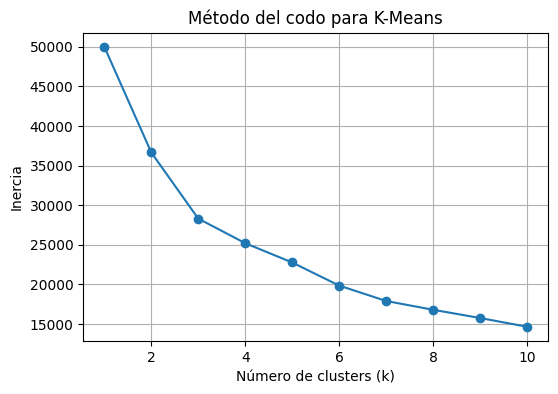

In [55]:
##Método del codo (K-MEANS)
# Rango de k a evaluar
ks = range(1, 11)
inertias = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia")
plt.title("Método del codo para K-Means")
plt.grid(True)

plt.savefig("figures/elbow_kmeans.png", dpi=200, bbox_inches="tight")
plt.show()

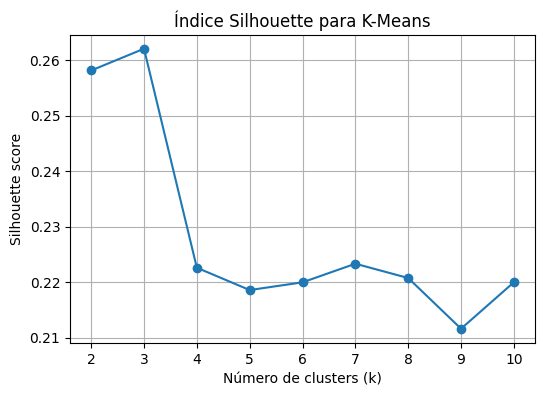

In [56]:
#Índice Silhouette para K-Means
ks_sil = range(2, 11)      # silhouette no tiene sentido para k=1
silhouette_scores = []

for k in ks_sil:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(6,4))
plt.plot(list(ks_sil), silhouette_scores, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette score")
plt.title("Índice Silhouette para K-Means")
plt.grid(True)

plt.savefig("figures/silhouette_kmeans.png", dpi=200, bbox_inches="tight")
plt.show()

In [58]:
# K-Means final
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_scaled)

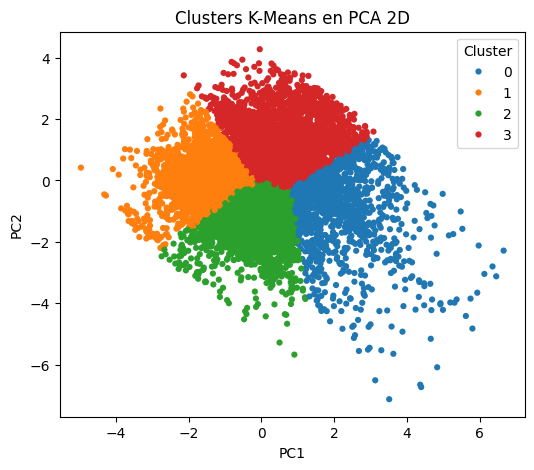

In [59]:
#PCA 2D y K-Means en PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels_kmeans,
    palette='tab10',
    s=20,
    linewidth=0
)
plt.title("Clusters K-Means en PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", loc="best")

plt.savefig("figures/kmeans_pca.png", dpi=200, bbox_inches="tight")
plt.show()

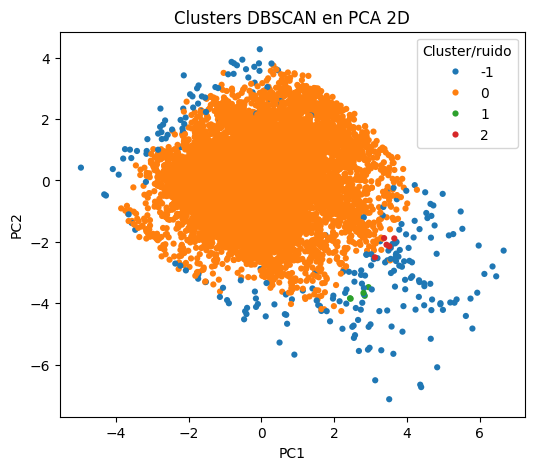

In [60]:
##DBSCAN en PCA 2D
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=labels_dbscan,
    palette='tab10',
    s=20,
    linewidth=0
)
plt.title("Clusters DBSCAN en PCA 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster/ruido", loc="best")

plt.savefig("figures/dbscan_pca.png", dpi=200, bbox_inches="tight")
plt.show()

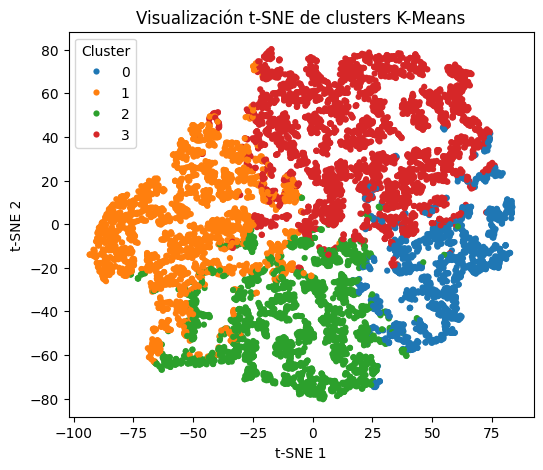

In [61]:
##t-SNE coloreado con K-Means
tsne = TSNE(n_components=2, learning_rate=200, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    hue=labels_kmeans,
    palette='tab10',
    s=20,
    linewidth=0
)
plt.title("Visualización t-SNE de clusters K-Means")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Cluster", loc="best")

plt.savefig("figures/tsne_kmeans.png", dpi=200, bbox_inches="tight")
plt.show()

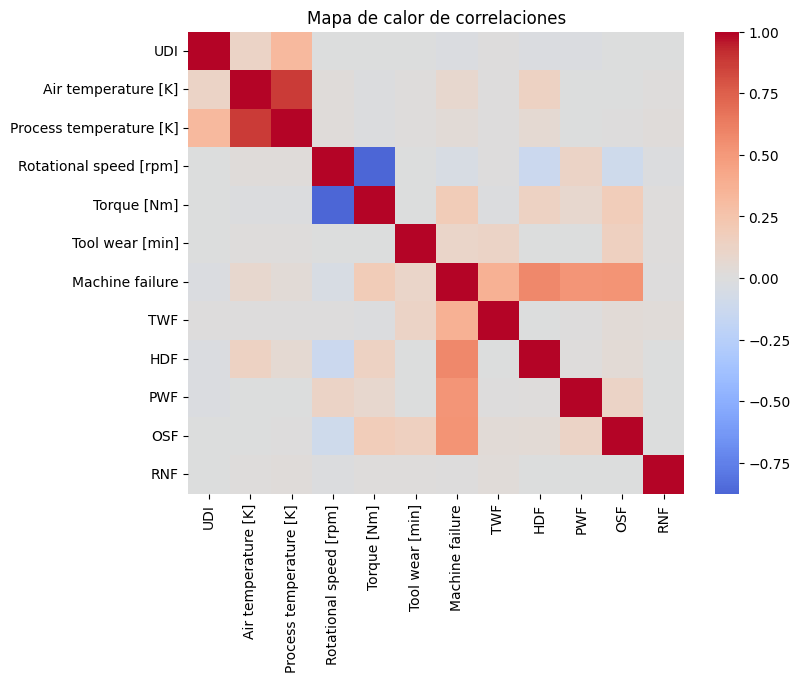

In [62]:
##Heatmap de correlaciones
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=['float64','int64']).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Mapa de calor de correlaciones")

plt.savefig("figures/heatmap_correlations.png", dpi=200, bbox_inches="tight")
plt.show()

In [65]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

os.makedirs("results", exist_ok=True)

df_results = df.copy()
df_results["KMeans_Cluster"] = labels_kmeans
df_results["DBSCAN_Cluster"] = labels_dbscan

In [66]:
variables_numericas = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

cluster_profiles = (
    df_results
    .groupby("KMeans_Cluster")[variables_numericas]
    .agg(['mean', 'std', 'min', 'max', 'count'])
)

cluster_profiles.to_csv("results/kmeans_cluster_profiles.csv")
cluster_profiles.head()

Air temperature [K]                                \
                              mean       std    min    max count   
KMeans_Cluster                                                     
0                       301.190345  1.483073  296.4  304.3  1419   
1                       298.461886  1.108315  295.3  301.7  2587   
2                       298.300128  1.093970  295.3  301.0  2339   
3                       301.727852  1.182751  299.1  304.5  3655   

               Process temperature [K]                                ...  \
                                  mean       std    min    max count  ...   
KMeans_Cluster                                                        ...   
0                           310.868992  1.058972  307.4  313.7  1419  ...   
1                           308.872594  0.887894  305.7  311.1  2587  ...   
2                           308.775203  0.905997  305.7  310.9  2339  ...   
3                           311.259617  0.874926  309.4  313.8  3655  ...   

               Torque [Nm]                             Tool wear [min]  \
                      mean       std   min   max count            mean   
KMeans_Cluster                                                           
0                25.777097  5.403619   3.8  36.3  1419      111.408034   
1                48.276189  6.145957  37.5  76.2  2587      106.906842   
2                33.564429  4.760358  14.6  43.5  2339      104.804190   
3                43.746566  7.195879  28.9  76.6  3655      109.361696   

                                          
                      std min  max count  
KMeans_Cluster                            
0               64.202885   0  244  1419  
1               63.477586   0  246  2587  
2               63.076882   0  244  2339  
3               63.850631   0  253  3655  

[4 rows x 25 columns]

In [67]:
n_clusters_kmeans = len(np.unique(labels_kmeans))
n_clusters_dbscan = len(set(labels_dbscan) - {-1})  # sin contar ruido

sil_kmeans = silhouette_score(X_scaled, labels_kmeans)

metrics = pd.DataFrame([
    {
        "modelo": "KMeans",
        "n_clusters": n_clusters_kmeans,
        "silhouette": round(sil_kmeans, 3),
        "inertia": round(kmeans.inertia_, 2)
    },
    {
        "modelo": "DBSCAN",
        "n_clusters": n_clusters_dbscan,
        "silhouette": np.nan,   # no siempre es adecuado calcularlo por el ruido
        "inertia": np.nan
    }
])

metrics.to_csv("results/model_metrics.csv", index=False)
metrics

,modelo,n_clusters,silhouette,inertia
0,KMeans,4,0.223,25200.33
1,DBSCAN,3,NaN,NaN


In [68]:
sample_with_clusters = df_results.sample(200, random_state=42)
sample_with_clusters.to_csv("results/sample_with_clusters.csv", index=False)
sample_with_clusters.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,KMeans_Cluster,DBSCAN_Cluster
6252,6253,L53432,L,300.8,310.3,1538,36.1,198,0,0,0,0,0,0,3,0
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,0,0,0,0,0,3,0
1731,1732,M16591,M,298.3,307.9,1485,42.0,117,0,0,0,0,0,0,1,0
4742,4743,L51922,L,303.3,311.3,1592,33.7,14,0,0,0,0,0,0,3,0
4521,4522,L51701,L,302.4,310.4,1865,23.9,129,0,0,0,0,0,0,0,0


In [78]:
!zip -r taller_semana3_repo.zip data notebooks src figures results README.md requirements.txt

updating: data/ (stored 0%)
updating: data/README_data.md (deflated 17%)
updating: notebooks/ (stored 0%)
updating: notebooks/Taller_Colaborativo_Semana3.ipynb (deflated 37%)
updating: src/ (stored 0%)
updating: src/preprocessing.py (deflated 34%)
updating: src/dimensionality_reduction.py (deflated 47%)
updating: src/dbscan_model.py (deflated 27%)
updating: src/kmeans_model.py (deflated 29%)
updating: figures/ (stored 0%)
updating: results/ (stored 0%)
updating: README.md (deflated 58%)
updating: requirements.txt (stored 0%)
updating: figures/dbscan_pca.png (deflated 3%)
updating: figures/elbow_kmeans.png (deflated 11%)
updating: figures/tsne_kmeans.png (deflated 2%)
updating: figures/kmeans_pca.png (deflated 3%)
updating: figures/heatmap_correlations.png (deflated 21%)
updating: figures/silhouette_kmeans.png (deflated 11%)
updating: notebooks/.ipynb_checkpoints/ (stored 0%)
updating: results/kmeans_cluster_profiles.csv (deflated 60%)
updating: results/model_metrics.csv (stored 0%)
upd